In [159]:
#Rough 
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [160]:
df = pd.read_csv("bloodpressuredata.csv")
print("The Data Is : \n",df)
#Data Seperation and Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = (df['Date'] - df['Date'].min()).dt.days
print("\n\nAfter Conversion the dataframe becomes :\n",df)


The Data Is : 
           Date  Systolic (mmHg)  Diastolic (mmHg)
0   2024-01-01              120                80
1   2024-01-02              125                70
2   2024-01-03              130                75
3   2024-01-04              135                85
4   2024-01-05              140                65
5   2024-01-06              145                90
6   2024-01-07              130                75
7   2024-01-08              125                70
8   2024-01-09              135                85
9   2024-01-10              130                80
10  2024-01-11              140                65
11  2024-01-12              125                70
12  2024-01-13              135                85
13  2024-01-14              140                75
14  2024-01-15              130                80
15  2024-01-16              125                70
16  2024-01-17              135                85
17  2024-01-18              140                65
18  2024-01-19              145   

In [161]:
#Create Training Set

X = df['Date']
Y = df['Systolic (mmHg)']
Y1 = df['Diastolic (mmHg)']
print("The Training Set Is : \n\n")
print("Date    SystolicPressure\n")
print(Y)
print("\n\nDate    DiastolicPressure\n")
print(Y1)

The Training Set Is : 


Date    SystolicPressure

0     120
1     125
2     130
3     135
4     140
5     145
6     130
7     125
8     135
9     130
10    140
11    125
12    135
13    140
14    130
15    125
16    135
17    140
18    145
19    130
Name: Systolic (mmHg), dtype: int64


Date    DiastolicPressure

0     80
1     70
2     75
3     85
4     65
5     90
6     75
7     70
8     85
9     80
10    65
11    70
12    85
13    75
14    80
15    70
16    85
17    65
18    90
19    75
Name: Diastolic (mmHg), dtype: int64


In [162]:
print("The Shape of x_train is : ",X.shape)
print("The Shape of y_train is : ",Y.shape)
print("The Shape of y1_train is : ",Y1.shape)
print("Number of training example(m) : ",len(X))

The Shape of x_train is :  (20,)
The Shape of y_train is :  (20,)
The Shape of y1_train is :  (20,)
Number of training example(m) :  20


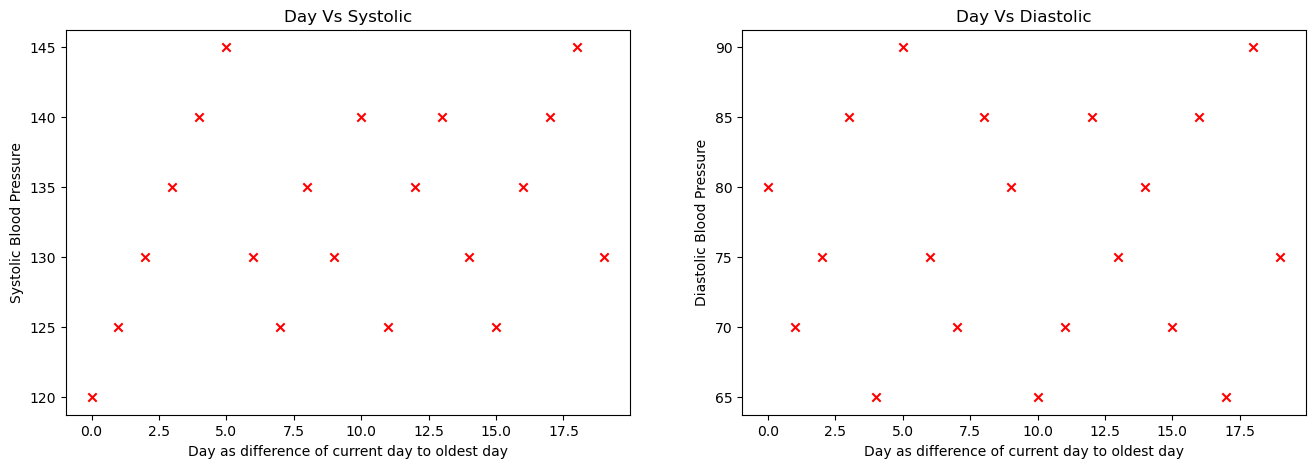

In [163]:
fig, axs = plt.subplots(1,2,figsize=(16,5))


#visualize data
axs[0].scatter(X, Y, marker='x', c='r') 

#Set Title
axs[0].set_title("Day Vs Systolic")

# Set the y-axis label
axs[0].set_ylabel("Systolic Blood Pressure")

# Set the x-axis label
axs[0].set_xlabel("Day as difference of current day to oldest day")

#visualize data
axs[1].scatter(X, Y1, marker='x', c='r') 

#Set Title
axs[1].set_title("Day Vs Diastolic")

# Set the y-axis label
axs[1].set_ylabel("Diastolic Blood Pressure")

# Set the x-axis label
axs[1].set_xlabel("Day as difference of current day to oldest day")


plt.show()



In [164]:
def predict_systolic():
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Convert pandas Series to numpy array and reshape it
    X_train = X_train.to_numpy().reshape(-1, 1)
    X_test = X_test.to_numpy().reshape(-1, 1)



    # Create and train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict blood pressure ratio for test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    #print("Mean Squared Error:", mse)

    # Example prediction for a next 7 days
    nextweekprediction = []
    for i in range(1 , 8):
        new_date = np.array([[df['Date'].max() + i]])  # predicting for a date 1 day after the last recorded date
        predicted_value = model.predict(new_date).round(0)
        nextweekprediction.append(predicted_value)
    return nextweekprediction

In [165]:
predict_systolic()

[array([135.]),
 array([135.]),
 array([135.]),
 array([135.]),
 array([136.]),
 array([136.]),
 array([136.])]

In [166]:
def predict_diastolic():
    X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=42)

    # Convert pandas Series to numpy array and reshape it
    X_train = X_train.to_numpy().reshape(-1, 1)
    X_test = X_test.to_numpy().reshape(-1, 1)



    # Create and train the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict blood pressure ratio for test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    #print("Mean Squared Error:", mse)

    # Example prediction for a new date
    nextweekprediction = []
    for i in range(1 , 8):
        new_date = np.array([[df['Date'].max() + i]])  # predicting for a date 1 day after the last recorded date
        predicted_value = model.predict(new_date).round(0)
        nextweekprediction.append(predicted_value)
    return nextweekprediction

In [167]:
predict_diastolic()

[array([81.]),
 array([82.]),
 array([82.]),
 array([82.]),
 array([83.]),
 array([83.]),
 array([83.])]

In [168]:
print("Coeff",model.coef_)
print("intercept",model.intercept_)

Coeff [1.44444444]
intercept 119.34722222222223


In [169]:
#TO-Do : Check the plot for above coeff -> 1. create new arrays by predicting the values using above parameters
# 2. create a scatter for original X and Y
# 3. create a line plot for original X and array of predicted values Y'
# All in One Plot

In [170]:
def pred_pressures():
    systolic = predict_systolic()
    diastolic = predict_diastolic()
    bloodpressure = []
    for i in range(0 , len(systolic)):
        bloodpressure.append((systolic[i]/diastolic[i]).round(2))
    return [systolic, diastolic, bloodpressure]

In [171]:
prediction = pred_pressures()

In [172]:
print("predicted values : ")
print("Systolic",prediction[0])
print("diastolic",prediction[1])
print("BP",prediction[2])

predicted values : 
Systolic [array([135.]), array([135.]), array([135.]), array([135.]), array([136.]), array([136.]), array([136.])]
diastolic [array([81.]), array([82.]), array([82.]), array([82.]), array([83.]), array([83.]), array([83.])]
BP [array([1.67]), array([1.65]), array([1.65]), array([1.65]), array([1.64]), array([1.64]), array([1.64])]


In [176]:
from datetime import date, timedelta
j = 1;
for i in prediction[0]:
    if(i > 135.0):
        print(f"Alert: Your Blood Pressure will be elevated till {date.today() + timedelta(days= j)}")
        j += 1
        break

Alert: Your Blood Pressure will be elevated till 2024-03-03
